In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Unit 5

## 2.4.1 Compute hinge loss

In [144]:
feature_matrix=np.array([[1,0,1],[1,1,1],[1,1,-1],[-1,1,1]])
labels=np.array([2,2.7,-0.7,2])

theta=np.array([0,1,2])
loss=np.zeros(feature_matrix.shape[0])

for i in range(feature_matrix.shape[0]):
    z=labels[i]-(np.dot(theta,feature_matrix[i]))
    if z>=1:
        loss[i]=0
    else:
        loss[i]=1-z
    print('loss',i+1,': ',labels[i],'-(',theta,'*',feature_matrix[i],'=',z,"-->loss:",loss[i])
avg_loss=1/feature_matrix.shape[0]*np.sum(loss)
print('Avg. loss:',avg_loss)

loss 1 :  2.0 -( [0 1 2] * [1 0 1] = 0.0 -->loss: 1.0
loss 2 :  2.7 -( [0 1 2] * [1 1 1] = -0.2999999999999998 -->loss: 1.2999999999999998
loss 3 :  -0.7 -( [0 1 2] * [ 1  1 -1] = 0.30000000000000004 -->loss: 0.7
loss 4 :  2.0 -( [0 1 2] * [-1  1  1] = -1.0 -->loss: 2.0
Avg. loss: 1.25


## 2.4.2 Compute Squared Error Loss

In [145]:
for i in range(feature_matrix.shape[0]):
    z_squared=(labels[i]-(np.dot(theta,feature_matrix[i])))**2
    loss[i]=z_squared/2
    print('loss',i+1,': ','z_squared=',z_squared,', z_squared/2=',loss[i])
avg_loss=1/feature_matrix.shape[0]*np.sum(loss)
print('Avg. loss:',avg_loss)

loss 1 :  z_squared= 0.0 , z_squared/2= 0.0
loss 2 :  z_squared= 0.0899999999999999 , z_squared/2= 0.04499999999999995
loss 3 :  z_squared= 0.09000000000000002 , z_squared/2= 0.04500000000000001
loss 4 :  z_squared= 1.0 , z_squared/2= 0.5
Avg. loss: 0.1475


# Unit 6

## 2. Higher Order Feature Vectors

In [146]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    if label*(np.dot(current_theta,feature_vector)+current_theta_0)<=0:
        current_theta=current_theta+label*feature_vector
        current_theta_0=current_theta_0+label

    result=(current_theta,current_theta_0)
    
    return result


def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    current_theta=np.zeros(len(feature_matrix[0]))
    current_theta_0=0

    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            (current_theta,current_theta_0)=perceptron_single_step_update(feature_matrix[i],labels[i],current_theta,current_theta_0)
    
    return (current_theta,current_theta_0)


def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    classified=np.empty(len(feature_matrix))
    for i in range(len(feature_matrix)):
        if np.dot(theta,feature_matrix[i])+theta_0>0:
            classified[i]=1
        else:
            classified[i]=-1

    return classified

def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

def classifier_accuracy(
        classifier,
        train_feature_matrix,
        train_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the validation
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    if classifier.__name__=="pegasos":
        (theta,theta_0)=classifier(train_feature_matrix,train_labels,kwargs.get('T'),kwargs.get('L'))
    else:
        (theta,theta_0)=classifier(train_feature_matrix,train_labels,kwargs.get('T'))

    train_accuracy=accuracy(classify(train_feature_matrix,theta,theta_0),train_labels)

    return train_accuracy

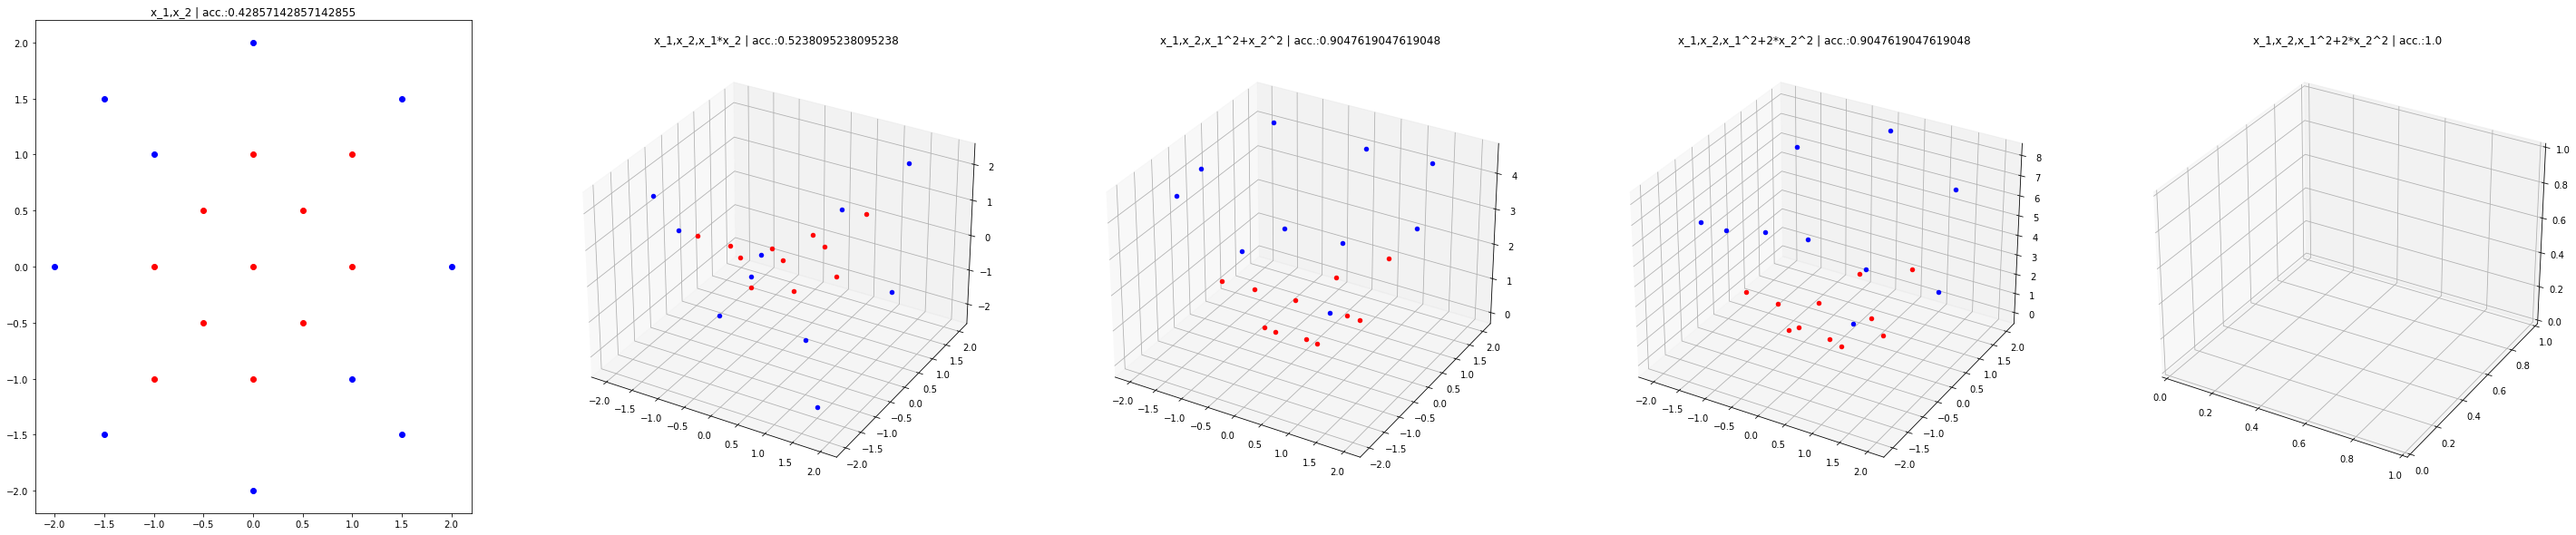

In [148]:
feature_matrix=np.array([[0.5,0.5],[-0.5,0.5],[0.5,-0.5],[-0.5,-0.5],[0,0],[0,1],[1,0],[0,-1],[-1,0],[0,2],[2,0],[-2,0],[0,-2],[1.5,-1.5],[1.5,1.5],[-1.5,-1.5],[-1.5,1.5],[1,1],[-1,1],[-1,-1],[1,-1]])
labels=np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,-1,1,-1,1])

fig = plt.figure(figsize=(50,10))
#ax1 = fig.add_subplot(151, projection='3d')
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152, projection='3d')
ax3 = fig.add_subplot(153, projection='3d')
ax4 = fig.add_subplot(154, projection='3d')
ax5 = fig.add_subplot(155, projection='3d')

#x_1*x_2
feature_matrix_3d_2=np.empty([feature_matrix.shape[0],3])
#x_1^2+x_2^2
feature_matrix_3d_3=np.empty([feature_matrix.shape[0],3])
#x_1^2+2*x_2^2
feature_matrix_3d_4=np.empty([feature_matrix.shape[0],3])
#x_1*x_2,x_1^2,x_2^2
feature_matrix_3d_5=np.empty([feature_matrix.shape[0],5])

for i in range(feature_matrix.shape[0]):
    feature_matrix_3d_2[i][0]=feature_matrix[i][0]
    feature_matrix_3d_2[i][1]=feature_matrix[i][1]
    feature_matrix_3d_2[i][2]=feature_matrix[i][0]*feature_matrix[i][1]

    feature_matrix_3d_3[i][0]=feature_matrix[i][0]
    feature_matrix_3d_3[i][1]=feature_matrix[i][1]
    feature_matrix_3d_3[i][2]=(feature_matrix[i][0])**2+(feature_matrix[i][1])**2

    feature_matrix_3d_4[i][0]=feature_matrix[i][0]
    feature_matrix_3d_4[i][1]=feature_matrix[i][1]
    feature_matrix_3d_4[i][2]=(feature_matrix[i][0])**2+2*(feature_matrix[i][1])**2

    feature_matrix_3d_5[i][0]=feature_matrix[i][0]
    feature_matrix_3d_5[i][1]=feature_matrix[i][1]
    feature_matrix_3d_5[i][2]=(feature_matrix[i][0])*(feature_matrix[i][1])
    feature_matrix_3d_5[i][3]=(feature_matrix[i][0])**2
    feature_matrix_3d_5[i][4]=(feature_matrix[i][1])**2

    if labels[i]==1:
        color='blue'
    else:
        color='red'

    ax1.scatter(feature_matrix[i][0],feature_matrix[i][1],c=color)
    ax2.scatter(feature_matrix_3d_2[i][0],feature_matrix_3d_2[i][1],feature_matrix_3d_2[i][2],c=color)
    ax3.scatter(feature_matrix_3d_3[i][0],feature_matrix_3d_3[i][1],feature_matrix_3d_3[i][2],c=color)
    ax4.scatter(feature_matrix_3d_4[i][0],feature_matrix_3d_4[i][1],feature_matrix_3d_4[i][2],c=color)

acc_1=classifier_accuracy(perceptron,feature_matrix,labels,T=10000)
ax1.set_title("x_1,x_2 | acc.:"+str(acc_1))

acc_2=classifier_accuracy(perceptron,feature_matrix_3d_2,labels,T=10000)
ax2.set_title("x_1,x_2,x_1*x_2 | acc.:"+str(acc_2))

acc_3=classifier_accuracy(perceptron,feature_matrix_3d_3,labels,T=10000)
ax3.set_title("x_1,x_2,x_1^2+x_2^2 | acc.:"+str(acc_3))

acc_4=classifier_accuracy(perceptron,feature_matrix_3d_4,labels,T=10000)
ax4.set_title("x_1,x_2,x_1^2+2*x_2^2 | acc.:"+str(acc_4))

acc_5=classifier_accuracy(perceptron,feature_matrix_3d_5,labels,T=10000)
ax5.set_title("x_1,x_2,x_1^2+2*x_2^2 | acc.:"+str(acc_5))

plt.show()